In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial import distance_matrix

In [2]:
df = pd.read_csv("../data/movie_data.csv", delimiter=";")

In [3]:
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5500,40000000.0,Crime,tt0117913,A Time to Kill,A young lawyer defends a black man accused of ...,13.309013,2.0,1.0,1996-07-24,152266007.0,149.0,1.0,7.0,522.0
5501,25000000.0,Action,tt0116320,Fled,"During a routine prison work detail, convict P...",3.906949,1.0,1.0,1996-07-19,17193231.0,NaN,1.0,5.2,49.0
5502,13000000.0,Fantasy,tt0116707,Joe's Apartment,A nice guy has just moved to New York and disc...,9.490858,0.0,1.0,1996-07-26,4619014.0,78.0,1.0,5.0,87.0
5503,26000000.0,Comedy,tt0116313,The First Wives Club,After years of helping their hubbies climb the...,NaN,1.0,1.0,1996-09-20,116400000.0,102.0,1.0,6.5,172.0


In [4]:
def data_preprocessing(df):
    var_df = df.select_dtypes(include='float64').dropna()

    scaler = StandardScaler()
    std_df = scaler.fit_transform(var_df)
    std_df = pd.DataFrame(data=std_df, columns=var_df.columns.values)

    return var_df, std_df

In [54]:
var_df, std_df = data_preprocessing(df)

In [69]:
var_df

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
0,30000000.0,21.946943,1.0,1.0,373554033.0,81.0,1.0,7.7,5415.0
1,65000000.0,17.015539,3.0,1.0,262797249.0,104.0,2.0,6.9,2413.0
2,16000000.0,3.859495,1.0,1.0,81452156.0,127.0,1.0,6.1,34.0
3,60000000.0,17.924927,3.0,1.0,187436818.0,170.0,2.0,7.7,1886.0
4,35000000.0,5.231580,3.0,1.0,64350171.0,106.0,1.0,5.5,174.0
...,...,...,...,...,...,...,...,...,...
5498,32000000.0,5.575992,1.0,1.0,152036382.0,123.0,1.0,6.2,328.0
5499,3500000.0,10.827266,1.0,1.0,9482579.0,96.0,2.0,5.7,71.0
5500,40000000.0,13.309013,2.0,1.0,152266007.0,149.0,1.0,7.0,522.0
5502,13000000.0,9.490858,0.0,1.0,4619014.0,78.0,1.0,5.0,87.0


In [70]:
std_df

,budget,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,vote_average,vote_count
0,-0.034670,2.128605,-0.886664,-0.463136,1.788698,-1.360726,-0.525049,1.566746,3.951587
1,0.854473,1.302755,0.036814,-0.463136,1.088086,-0.291382,0.553363,0.679210,1.423905
2,-0.390327,-0.900457,-0.886664,-0.463136,-0.059045,0.777963,-0.525049,-0.208327,-0.579211
3,0.727452,1.455048,0.036814,-0.463136,0.611380,2.777173,0.553363,1.566746,0.980171
4,0.092350,-0.670677,0.036814,-0.463136,-0.167226,-0.198395,-0.525049,-0.873979,-0.461332
...,...,...,...,...,...,...,...,...,...
5175,0.016138,-0.612999,-0.886664,-0.463136,0.387448,0.591990,-0.525049,-0.097385,-0.331664
5176,-0.707878,0.266419,-0.886664,-0.463136,-0.514301,-0.663328,0.553363,-0.652095,-0.548058
5177,0.219371,0.682031,-0.424925,-0.463136,0.388901,1.800815,-0.525049,0.790152,-0.168316
5178,-0.466539,0.042614,-1.348404,-0.463136,-0.545066,-1.500206,-0.525049,-1.428690,-0.534586


In [71]:
std_vars = std_df
std_vars.size

46620

In [81]:
dist_matrix = distance_matrix(std_vars, std_vars)
dist_matrix.shape

(5180, 5180)

In [78]:
condensed_dist_matrix = squareform(dist_matrix)
condensed_dist_matrix.shape

(13413610,)

In [29]:
import math


def distance(p, q):
    return math.sqrt(sum([(pi - qi)**2 for pi, qi in zip(p, q)]))


def single_link(ci, cj):
    return min([distance(vi, vj) for vi in ci for vj in cj])


def complete_link(ci, cj):
    return max([distance(vi, vj) for vi in ci for vj in cj])


def average_link(ci, cj):
    distances = [distance(vi, vj) for vi in ci for vj in cj]
    return sum(distances) / len(distances)


def get_distance_measure(M):
    if M == 0:
        return single_link
    elif M == 1:
        return complete_link
    else:
        return average_link

In [84]:
class AgglomerativeHierarchicalClustering:
    def __init__(self, data, K, M):
        self.data = data
        self.N = len(data)
        self.K = K
        self.measure = get_distance_measure(M)
        self.clusters = self.init_clusters()

    def init_clusters(self):
        return {data_id: np.array([data_point]) for data_id, data_point in enumerate(self.data)}


    def find_closest_clusters(self):
        min_dist = math.inf
        closest_clusters = None

        clusters_ids = list(self.clusters.keys())

        for i, cluster_i in enumerate(clusters_ids[:-1]):
            for j, cluster_j in enumerate(clusters_ids[i+1:]):
                dist = self.measure(self.clusters[cluster_i], self.clusters[cluster_j])
                if dist < min_dist:
                    min_dist, closest_clusters = dist, (cluster_i, cluster_j)
        return closest_clusters

    def merge_and_form_new_clusters(self, ci_id, cj_id):
        new_clusters = {0: np.concatenate((self.clusters[ci_id], self.clusters[cj_id]))}

        for cluster_id, cluster in self.clusters.items():
            if (cluster_id == ci_id) or (cluster_id == cj_id):
                continue
            new_clusters[len(new_clusters.keys())] = cluster
        return new_clusters


    def run_algorithm(self):
        while len(self.clusters.keys()) > self.K:
            print("Number of clusters: {}".format(len(self.clusters.keys())))
            closest_clusters = self.find_closest_clusters()
            self.clusters = self.merge_and_form_new_clusters(*closest_clusters)

    def print(self):
        for id, points in self.clusters.items():
            print("Cluster: {}".format(id))
            for point in points:
                print("    {}".format(point))

In [85]:
agg_hierarchical_clustering = AgglomerativeHierarchicalClustering(dist_matrix, 1, 2)

In [86]:
agg_hierarchical_clustering.run_algorithm()

Number of clusters: 5180


In [62]:
Z = linkage(condensed_dist_matrix, method='complete')

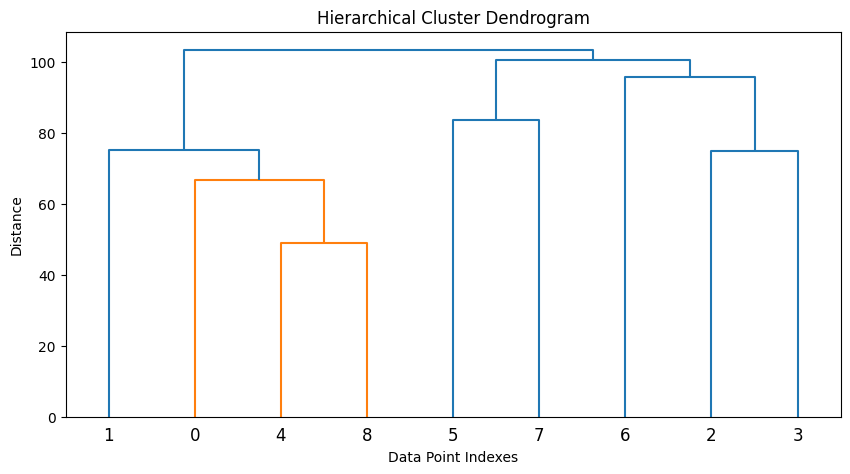

In [68]:
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Data Point Indexes')
plt.ylabel('Distance')
plt.show()